In [1]:
import cv2

In [2]:
from deepface import DeepFace

In [3]:
img = cv2.imread('Cry.jpg')

In [4]:
import matplotlib.pyplot as plt

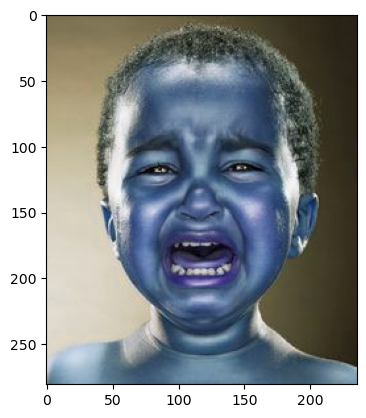

In [5]:
plt.imshow(img)

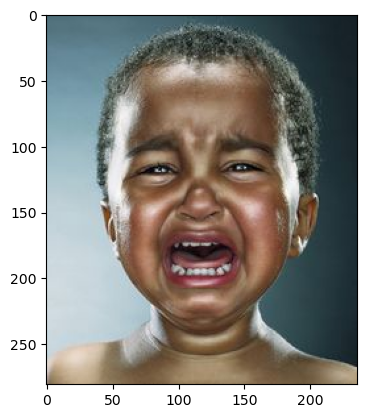

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [7]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:23<00:00,  5.87s/it]   


In [8]:
predictions

[{'emotion': {'angry': 2.0432965829968452,
   'disgust': 0.0208952886168845,
   'fear': 5.043782666325569,
   'happy': 0.1652681501582265,
   'sad': 92.71451234817505,
   'surprise': 3.620834831963293e-05,
   'neutral': 0.012206201063236222},
  'dominant_emotion': 'sad',
  'region': {'x': 41, 'y': 58, 'w': 154, 'h': 154},
  'age': 27,
  'gender': {'Woman': 0.1291487831622362, 'Man': 99.87084865570068},
  'dominant_gender': 'Man',
  'race': {'asian': 0.7353193099242038,
   'indian': 3.3545876058690314,
   'black': 93.12836486866264,
   'white': 0.1470654708446843,
   'middle eastern': 0.1014742478675692,
   'latino hispanic': 2.533191220950557},
  'dominant_race': 'black'}]

In [9]:
type(predictions)

list

In [10]:
predictions[0]['dominant_emotion']

'sad'

In [11]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [13]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 
                predictions[0]['dominant_emotion'],
                (0, 50),
                font, 1,
                (0,0,225),
                2,
                cv2.LINE_4);

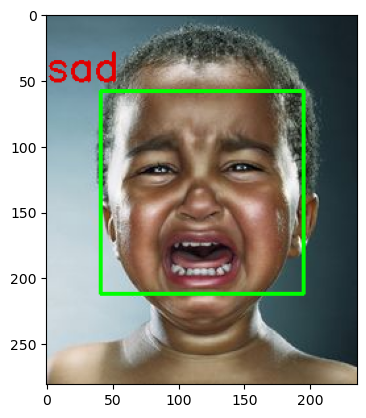

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
import cv2
from deepface import DeepFace

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while True:
    ret, frame = cap.read()
    result = DeepFace.analyze(frame, actions=['emotion'])
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(frame, 
                result[0]['dominant_emotion'],
                (50, 50),
                font, 3,
                (0, 0, 255),  # Fixed the color (0,0,255) corresponds to red
                2,
                cv2.LINE_4)
    
    cv2.imshow('Demo video', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.39it/s]


Action: emotion:   0%|          | 0/1 [00:00<?, ?it/s]


KeyboardInterrupt: 